# A Fast Introduction to Julia for Python and MATLAB Programmers

### This tutorial is based on Julia 0.6.3
It assumes basic knowledge of programming in other languages, especially in Python and MATLAB, and gives a glance of main features  of Julia. 

[For details please see official docs](https://docs.julialang.org/en/stable/)


## Motivation: Timing
Very similar to MATLAB.

As a motivation, I wrote a basic for loop in Python which performs 1000 matrix multiplications having dimensions of (300, 500). 

It took 5.5207 seconds.
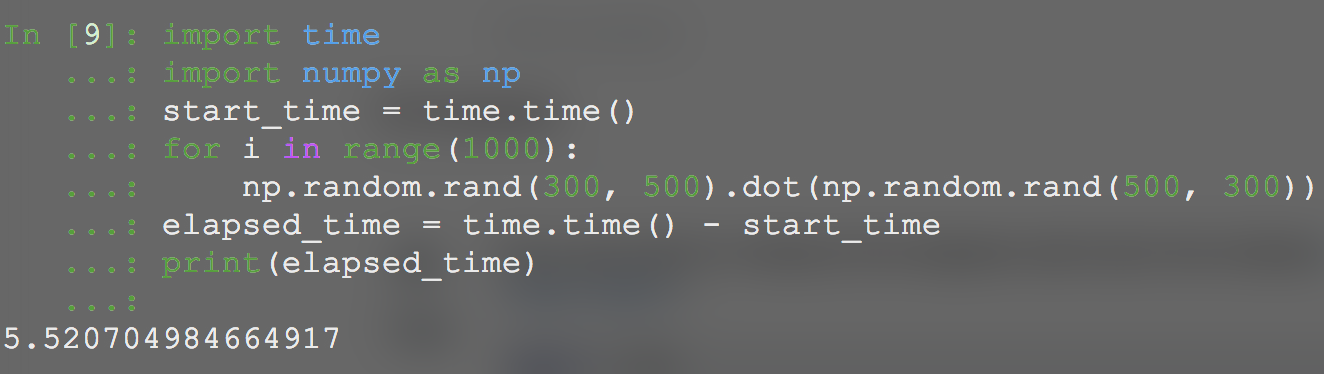
Now let's do same thing in Julia:

In [1]:
tic()
for i= 1:1000
    rand(300, 500) * rand(500,300)
end
toc()

elapsed time: 3.247396853 seconds


3.247396853

** It takes 3.5713 seconds. Impressive! **

[See Julia's benchmark page for detailed analysis.](https://julialang.org/benchmarks/)

### First things first: Print function
It has usual print(without new line), println(with new line), printf(C style formatting) function.

In [2]:
println("a")
print("b")
@printf("%.0f %.1f", 0.5, 0.025) 
# NOTE: printf is macro not function, explanation below:
# https://stackoverflow.com/a/19784718/7606396

a
b1 0.0

In [3]:
# Check version and other stuff
versioninfo()

Julia Version 0.6.3
Commit d55cadc350 (2018-05-28 20:20 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i5-6360U CPU @ 2.00GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, skylake)


### Basic literals and types

In [4]:
1::Int64 # 64-bit integer, no overflow warnings, fails on 32 bit Julia
1.0::Float64 # 64-bit float, defines NaN, -Inf, Inf
true::Bool # boolean, allows "true" and "false"
'c'::Char # character, allows Unicode
"s"::AbstractString # strings, allows Unicode, see also Strings

"s"

In [5]:
# type conversion
Int64(8.0)
Int(8.0) # Prefer this instead of Int64 since it's more generic.
Bool(1)
string(1, true, 13)

"1true13"

In [6]:
Int64("13")

LoadError: [91mMethodError: Cannot `convert` an object of type String to an object of type Int64
This may have arisen from a call to the constructor Int64(...),
since type constructors fall back to convert methods.[39m

In [7]:
convert(String, "13")

"13"

#### Hierarchy of numeric types
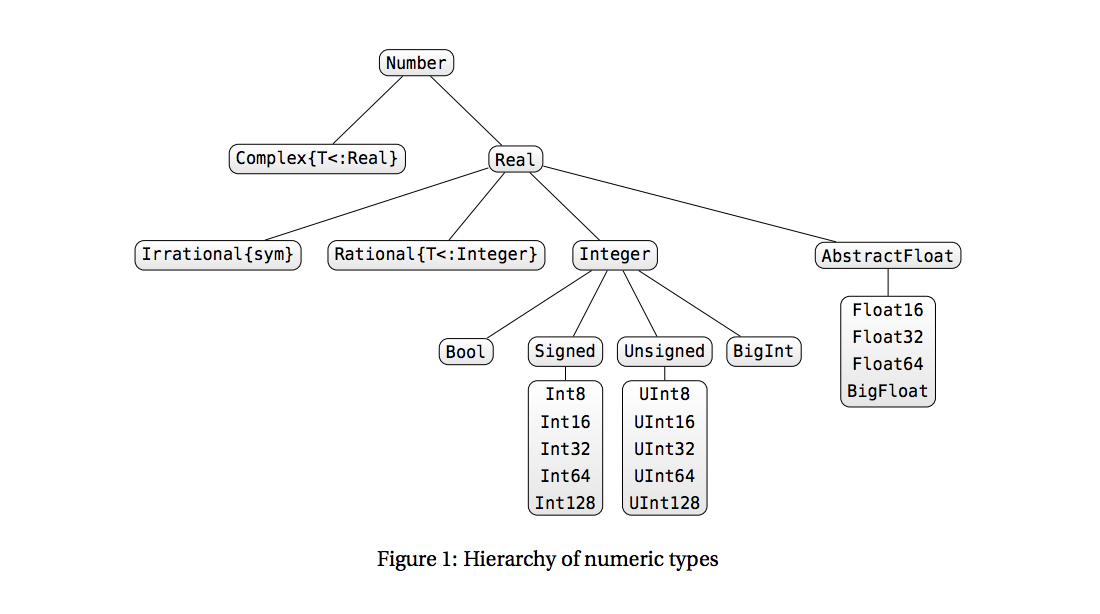
Source: http://bogumilkaminski.pl/files/julia_express.pdf

In [8]:
# Returns type
typeof([3.0])

Array{Float64,1}

In [9]:
# is type of?
isa(1.0, String)

false

In [10]:
Any # all objects are of this type
Void # type indicating nothing, subtype of Any

Void

In [11]:
# Tuple
("A", 3/0) 
('a', false)::Tuple{Char, Bool}  # Type assertion for tuple

('a', false)

### Arrays, matrices and other beautiful things

In [12]:
# Create an array
reshape(1:12, 3, 4) # 3x4 array filled with 1:12 values
fill("a", 2, 2) # 2x2 array filled with "a"
ones(5) # vector of Float64 ones
a = rand(Float64 ,2, 3, 4) # 2x3x4 array of Chars

2×3×4 Array{Float64,3}:
[:, :, 1] =
 0.417727   0.791665  0.0876757
 0.0898441  0.957126  0.262942 

[:, :, 2] =
 0.827368  0.821292  0.356737 
 0.261361  0.325897  0.0138832

[:, :, 3] =
 0.195159  0.893015  0.985201 
 0.203907  0.976777  0.0797735

[:, :, 4] =
 0.246343  0.228134  0.426682
 0.653083  0.678691  0.12721 

In [13]:
a[1,1,2]

0.8273684130270988

In [14]:
# Comprehension
[x * y for x in 1:2, y in 1:3] # comprehension generating 2x3 array

2×3 Array{Int64,2}:
 1  2  3
 2  4  6

In [15]:
[1, 2]' # Transpose


1×2 RowVector{Int64,Array{Int64,1}}:
 1  2

In [16]:
[1; 2] == [1 2]' # false, different array dimensions
[1, 2, 3] .^ 2 # element wise operations
ndims(a) # number of dimensions in a
eltype(a) # type of elements in a
length(a) # number of elements in a
size(a) # tuple containing dimension sizes of a
vec(a) # cast array to vetor (single dimension)
sum(a, 3) # calculate sums for 3rd dimensions,

# We use -1 for unknown dim in Python.
# Here, ':' is used
# ';' suppress the output as in MATLAB
reshape(a, 3, 2, :);

# ! at the end of function means it changes it's argument.
reverse!([1, 2, 3])

3-element Array{Int64,1}:
 3
 2
 1

In [17]:
# Accessing is similar to MATLAB
a = reshape(1:12, 3, 4)
a[:, 1:2] # 3x2 matrix
a[:, 1] # 3 element vector
a[1, :] # 4 element vecto

4-element Array{Int64,1}:
  1
  4
  7
 10

#### Copy
If the field type is immutable it will be copied by value. If it is mutable, it will be copied by reference.


In [18]:
x = Array{Any}(2)
x[1] = ones(2)
x[2] = trues(3)
a = x
b = copy(x) # shallow copy
c = deepcopy(x) # deep copy
x[1] = "Bang"
x[2][1] = false
a # identical as x
b # only x[2][1] changed from
c # same with initial x

2-element Array{Any,1}:
 [1.0, 1.0]            
 Bool[true, true, true]

In [19]:
# Dictionary
x = Dict("a"=>1)
collect(keys(x))
collect(values(x))
x["a"] 

1

In [20]:
"Hello " * "world!" # string concatenation
"Erşan Kuneri " ^ 3 # repeat string

"Erşan Kuneri Erşan Kuneri Erşan Kuneri "

## Control flows

In [21]:
x = 1 # x is Int32 on 32 bit machine and Int64 on 64 bit machine

1

In [22]:
# Expression

x = (a = 1; 2 * a) # after: x = 2; a = 1
y = begin
b = 3
3 * b
end # after: y = 9; b = 3

9

In [23]:
# If statement

if 3 == 2 + 1
    z = 1
elseif 1==2
    z = 2
else
    a = 3
end 

# If true A else B
1==2 ? "A" : "B" # standard ternary operator

"B"

In [24]:
i = 10
while true
    i +=1
    if i > 10
        break
    end
end

In [25]:
for x in 1:10
    if 3 < x < 5
        print(x)
    end
end

4

In [26]:
# Functions
f(x, y=10) = x + y
f(2)

function bloody_function(x::Int, y)
    x += 5
    # y could be any type
    return y
end
bloody_variable = 0
bloody_function(bloody_variable, "return this please")
bloody_function(bloody_variable, true)

# Primitives are pass by value
bloody_variable

0

In [27]:
# MATLAB style function definitions
bloody_function(x::String) = return "Thanks"
# list all methods
methods(bloody_function)

# 2 methods for generic function "bloody_function":
bloody_function(x::String) in Main at In[27]:2
bloody_function(x::Int64, y) in Main at In[26]:6

In [28]:
struct Point
    x::Int64
    y::Float64
    meta
end

p = Point(1, 2, "lol")
p.meta

"lol"

In [29]:
# Use anonymous(lambda?) functions with map
map(x -> x^2 + 2x - 1, [1,3,-1])

3-element Array{Int64,1}:
  2
 14
 -2

In [30]:
# Multiple values can be returned by constructing tuple
# Parantheses are not must.
function foo(a,b)
           a+b, a*b
end

foo (generic function with 1 method)

In [31]:
# Functions with keyword arguments are defined using a semicolon
# in the signature:

function plot_it(x, y; style="solid", width=1, color="black")
    ###some plotting code here
end

plot_it (generic function with 1 method)

In [32]:
[1 2] .< [2 1] # vectorized operators need ’.’
# multiplication can be omitted 
2x + 2(x+1)

42

In [33]:
[1 2 3] # 1×3 Array{Int64,2}:
[1, 2, 3] # 3-element Array{Int64,1}:

3-element Array{Int64,1}:
 1
 2
 3

In [34]:
# broadcasting is possible but a bit different from Numpy
x = [1 2 3]
y = [1, 2, 3]
z = reshape(1:9, 3, 3)
#z + x # error
z .+ x # x broadcasted vertically
z .+ y # y broadcasted horizontally

3×3 Array{Int64,2}:
 2  5   8
 4  7  10
 6  9  12

### Types
Julia's type system is dynamic, but gains some of the advantages of static type systems by making it possible to indicate that certain values are of specific types. 

Many Julia programmers may never feel the need to write code that explicitly uses types. Some kinds of programming, however, become clearer, simpler, faster and more robust with declared types.



The :: operator can be used to attach type annotations to expressions and variables in programs. 2 reasons to do this:

- To provide extra type information to the compiler, which can then improve performance in some cases

- As an assertion to help confirm that your program works the way you expect,

### Modules
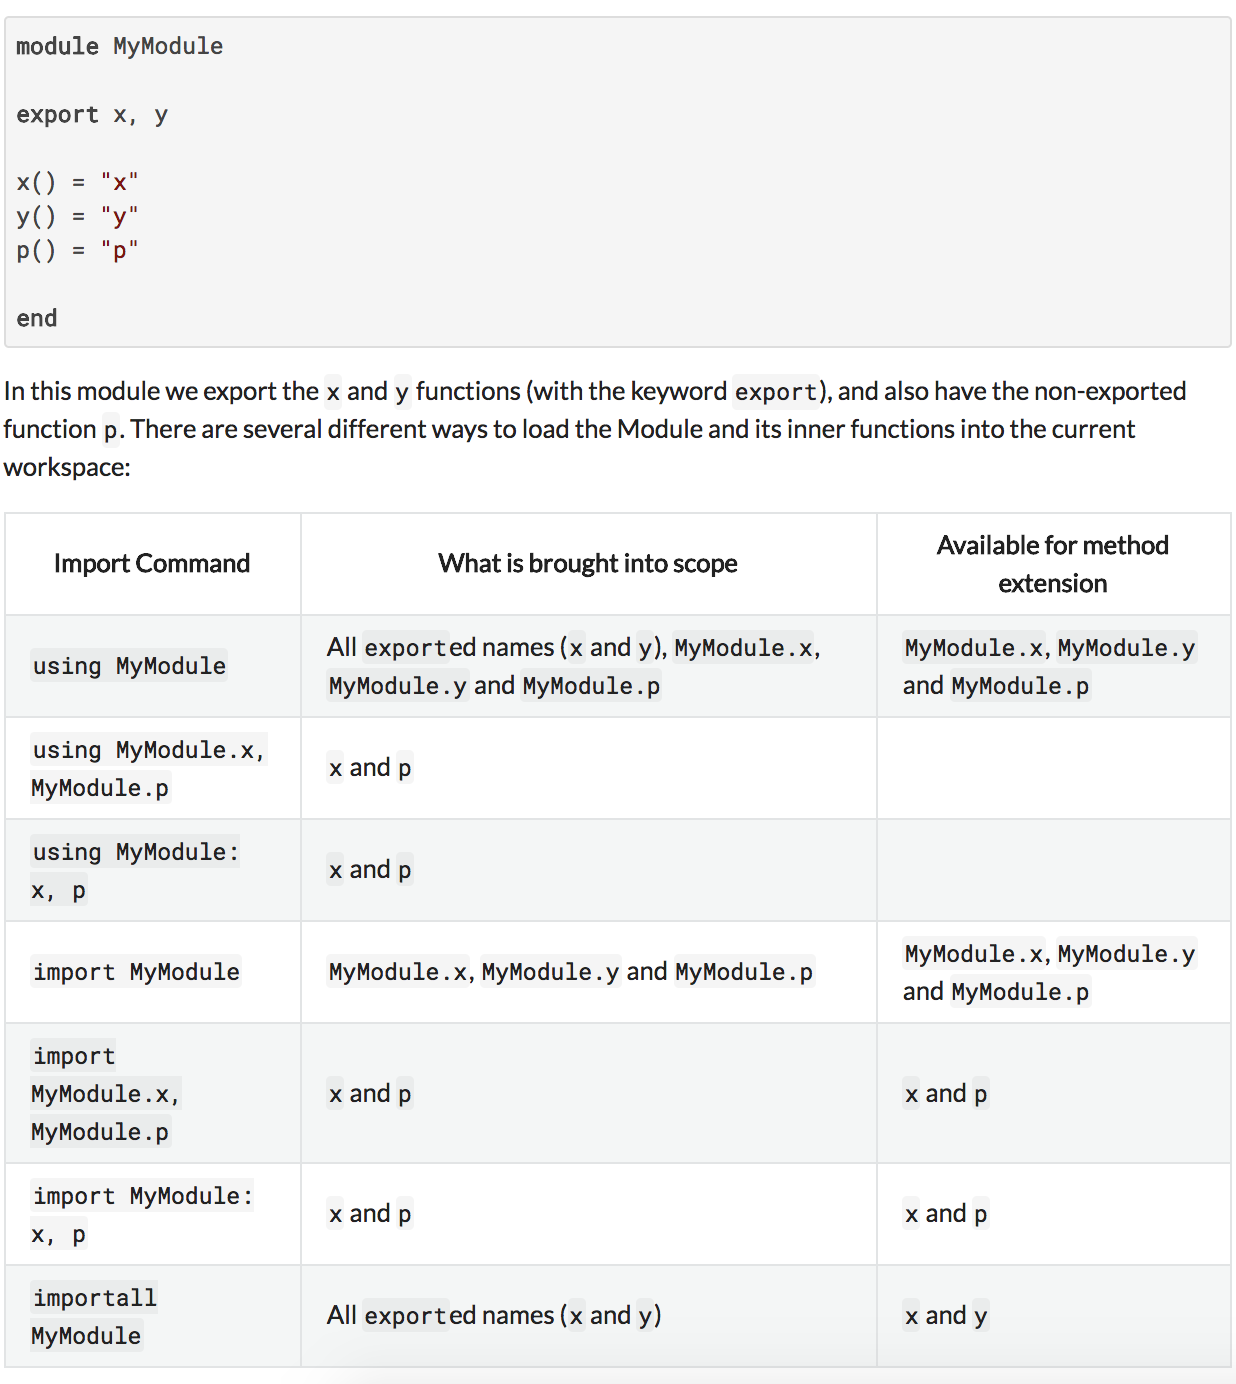

## IO operations


In [35]:
# Write
filepath = open("dummy.txt", "w+")
write(filepath, "Quite Pythonic...\nRight?")
close(filepath)

# Read
open("dummy.txt") do filepath
    for l in eachline(filepath)
        println(l)
    end
end

Quite Pythonic...
Right?


## Macros
See https://docs.julialang.org/en/v0.6.1/manual/metaprogramming/

## Plotting

Plotting in Julia is available through external packages.
[Please check official documentation.](https://julialang.org/downloads/plotting.html)

In [ ]:
?workspace()
# Above calls help for given function
# See workspace's description.

#### Sources

http://bogumilkaminski.pl/files/julia_express.pdf

https://docs.julialang.org/en/stable/

https://juliadocs.github.io/Julia-Cheat-Sheet/